# Análisis de Conjuntos de DNIs
Este notebook contiene operaciones y visualizaciones para el trabajo integrador de Matemáticas (Conjuntos).

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DNIs y conversión a conjuntos de dígitos
dnis = [
    38095321,
    35109356,
    38537195,
    35051272,
    30485503
]

# Crear conjuntos únicos de dígitos por DNI
conjuntos = [set(str(dni)) for dni in dnis]
conjuntos_digitos = [set(int(d) for d in c) for c in conjuntos]

# A. Frecuencia de dígitos global
todos_los_digitos = [int(d) for dni in dnis for d in str(dni)]
frecuencia = pd.Series(todos_los_digitos).value_counts().sort_index()

# B. Matriz de intersecciones
intersecciones = np.zeros((5, 5), dtype=int)
for i in range(5):
    for j in range(5):
        intersecciones[i][j] = len(conjuntos_digitos[i].intersection(conjuntos_digitos[j]))
df_inter = pd.DataFrame(intersecciones, columns=[f'C{j+1}' for j in range(5)], index=[f'C{i+1}' for i in range(5)])

# C. Cardinalidad por conjunto
cardinalidades = [len(c) for c in conjuntos_digitos]

# D. Complemento respecto al conjunto universal
universal = set(range(10))
complementos = [universal - c for c in conjuntos_digitos]
card_complementos = [len(c) for c in complementos]

# E. Dígitos comunes a todos
comunes_todos = set.intersection(*conjuntos_digitos)
print("Dígitos comunes a todos los DNIs:", comunes_todos)


Matplotlib is building the font cache; this may take a moment.


Dígitos comunes a todos los DNIs: {3, 5}


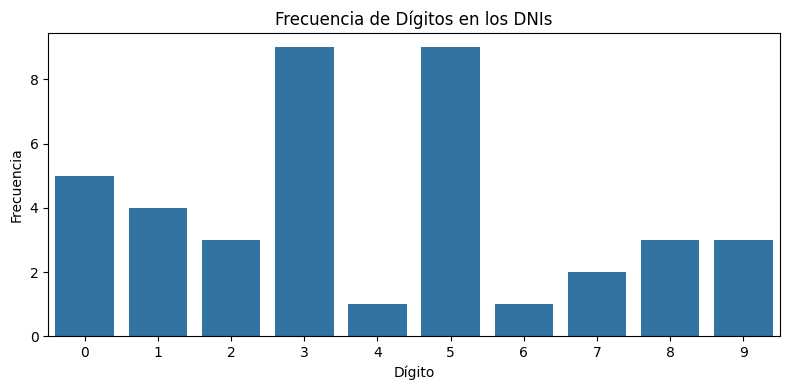

In [2]:

plt.figure(figsize=(8, 4))
sns.barplot(x=frecuencia.index, y=frecuencia.values)
plt.title("Frecuencia de Dígitos en los DNIs")
plt.xlabel("Dígito")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


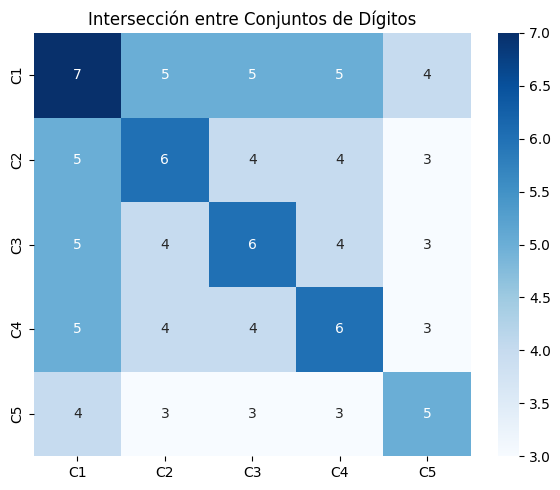

In [3]:

plt.figure(figsize=(6, 5))
sns.heatmap(df_inter, annot=True, cmap="Blues", fmt="d")
plt.title("Intersección entre Conjuntos de Dígitos")
plt.tight_layout()
plt.show()


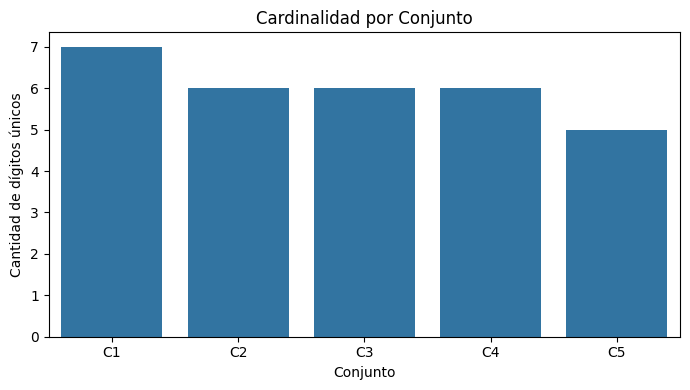

In [4]:

plt.figure(figsize=(7, 4))
sns.barplot(x=[f'C{i+1}' for i in range(5)], y=cardinalidades)
plt.title("Cardinalidad por Conjunto")
plt.xlabel("Conjunto")
plt.ylabel("Cantidad de dígitos únicos")
plt.tight_layout()
plt.show()


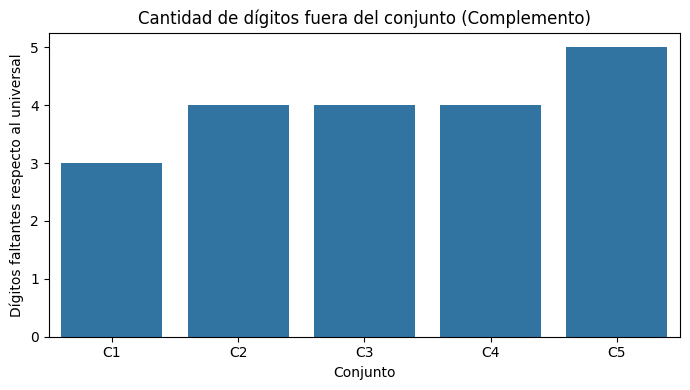

In [5]:

plt.figure(figsize=(7, 4))
sns.barplot(x=[f'C{i+1}' for i in range(5)], y=card_complementos)
plt.title("Cantidad de dígitos fuera del conjunto (Complemento)")
plt.xlabel("Conjunto")
plt.ylabel("Dígitos faltantes respecto al universal")
plt.tight_layout()
plt.show()
